<a href="https://colab.research.google.com/github/Huxaifax/TensorFlow-/blob/main/Img_classification__Logistic_regresstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3B5C7093D0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
%logstate

Logging has not been activated.


Label: 5


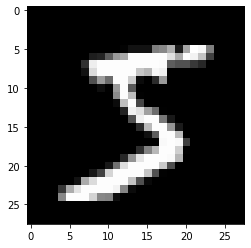

In [8]:
#let's look couple of images from dataset
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 7


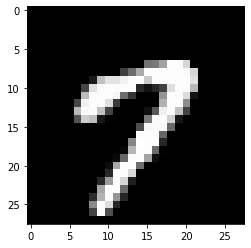

In [9]:
image,label=dataset[15]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


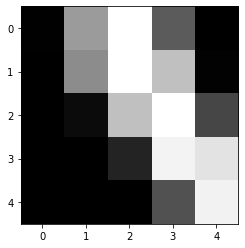

In [13]:
#we can plot the tensor as an image using plt.imshow
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [14]:
import numpy as np
n=60000
val_pct=0.2
n_val=int(val_pct*n)
idxs=np.random.permutation(n)
idxs

def split_indices(n,val_pct):
    #determine size of validation set
    n_val=int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs=np.random.permutation(n)
    #pick first n_val indices for validation set
    return idxs[n_val:],idxs[:n_val]

In [15]:
train_indices,val_indices=split_indices(len(dataset),val_pct=0.2)

In [16]:
print(len(train_indices),len(val_indices))
print('Sample val indices:',val_indices[:20])

48000 12000
Sample val indices: [ 9613 42868 27483 12003 43058  8320  6875 37338 10345 43152  5962 45381
 48526 57279 30682 44356 48845 40863 28081 57075]


In [17]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [18]:
batch_size=100
#training sampler and dataloader
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)
#validation sampler and dataloader
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)

In [19]:
import torch.nn as nn
input_size=28*28
num_classes=10

#logistic regression model
model=nn.Linear(input_size,num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0102, -0.0010,  0.0219,  ..., -0.0032,  0.0175, -0.0078],
        [-0.0059, -0.0326, -0.0198,  ..., -0.0144, -0.0144, -0.0210],
        [-0.0159,  0.0103, -0.0059,  ...,  0.0239,  0.0087,  0.0346],
        ...,
        [ 0.0096,  0.0350, -0.0244,  ...,  0.0178,  0.0154, -0.0148],
        [ 0.0228,  0.0019, -0.0189,  ..., -0.0128, -0.0260,  0.0089],
        [-0.0330, -0.0069,  0.0118,  ..., -0.0028, -0.0059,  0.0160]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0326,  0.0038,  0.0326, -0.0020, -0.0244,  0.0340, -0.0265, -0.0271,
         0.0046, -0.0170], requires_grad=True)

In [22]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images)
    break

tensor([7, 0, 0, 2, 3, 9, 9, 0, 3, 8, 8, 0, 1, 4, 6, 1, 6, 8, 5, 3, 1, 1, 6, 4,
        3, 3, 7, 7, 2, 9, 7, 6, 2, 2, 2, 0, 2, 5, 3, 3, 0, 8, 9, 9, 5, 6, 4, 1,
        0, 0, 7, 0, 4, 5, 5, 6, 4, 0, 1, 3, 0, 1, 5, 4, 6, 9, 8, 2, 3, 8, 2, 1,
        0, 0, 9, 4, 3, 7, 7, 1, 3, 6, 3, 1, 2, 4, 3, 6, 9, 0, 0, 0, 3, 6, 1, 0,
        0, 0, 1, 8])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [23]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
model=MnistModel()

In [24]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-3.1266e-02, -7.9933e-03, -1.1509e-02,  ..., -5.8064e-03,
           2.7864e-02,  2.5274e-02],
         [ 1.3963e-02,  2.0749e-02,  1.7613e-03,  ...,  2.9934e-02,
           4.8846e-05, -1.4609e-02],
         [ 1.5613e-02,  3.1650e-02, -1.2020e-02,  ...,  1.2338e-02,
           2.1268e-02, -2.3806e-02],
         ...,
         [ 1.7613e-04,  3.4831e-02,  2.2995e-02,  ...,  1.3939e-02,
          -4.3508e-03,  1.9715e-02],
         [ 1.0121e-02,  1.3161e-02,  1.0336e-02,  ...,  1.7437e-02,
          -2.4473e-02,  3.4754e-02],
         [-8.0769e-03,  2.7330e-02, -1.7564e-02,  ...,  1.5866e-02,
          -1.7523e-02,  1.3511e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0288,  0.0223, -0.0324, -0.0285, -0.0016,  0.0090, -0.0310, -0.0026,
         -0.0223, -0.0213], requires_grad=True)]

In [26]:
for images,labels in train_loader:
        outputs=model(images)
        break
print('Outputs.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

Outputs.shape: torch.Size([100, 10])
Sample outputs:
 tensor([[-0.3229, -0.0368,  0.0798,  0.3006, -0.2496, -0.1858, -0.3344,  0.0714,
         -0.4196, -0.2285],
        [-0.2776, -0.1077, -0.1810,  0.1864,  0.3408,  0.0006,  0.1882,  0.1145,
         -0.2954, -0.1287]])


In [27]:
import torch.nn.functional as F

In [28]:
probs=F.softmax(outputs,dim=1)
print("Sample probabilities:\n",probs[:2].data)
print("sum:",torch.sum(probs[1]).item())

Sample probabilities:
 tensor([[0.0807, 0.1074, 0.1207, 0.1505, 0.0868, 0.0925, 0.0798, 0.1197, 0.0732,
         0.0887],
        [0.0754, 0.0893, 0.0830, 0.1199, 0.1399, 0.0995, 0.1201, 0.1115, 0.0740,
         0.0875]])
sum: 0.9999999403953552


In [29]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([3, 4, 3, 3, 3, 6, 3, 3, 2, 3, 4, 7, 3, 1, 4, 4, 3, 2, 2, 2, 4, 3, 3, 3,
        7, 7, 4, 7, 3, 3, 3, 4, 3, 7, 3, 3, 4, 0, 4, 1, 5, 7, 6, 1, 4, 3, 4, 4,
        2, 3, 7, 1, 4, 7, 2, 3, 3, 3, 3, 2, 3, 4, 3, 2, 3, 3, 4, 3, 1, 1, 5, 1,
        2, 1, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 7, 4, 4, 3, 1, 3, 3, 4, 0, 4, 4, 4,
        5, 3, 3, 4])
tensor([0.1505, 0.1399, 0.1405, 0.1408, 0.1537, 0.1207, 0.1493, 0.1705, 0.1142,
        0.1671, 0.1552, 0.1288, 0.1430, 0.1348, 0.1191, 0.1478, 0.1183, 0.1516,
        0.1228, 0.1196, 0.1457, 0.1639, 0.1241, 0.1471, 0.1270, 0.1259, 0.1437,
        0.1233, 0.1368, 0.1467, 0.1271, 0.1524, 0.1387, 0.1311, 0.1414, 0.2048,
        0.1452, 0.1348, 0.1330, 0.1322, 0.1345, 0.1237, 0.1284, 0.1342, 0.1239,
        0.1706, 0.1400, 0.1454, 0.1408, 0.1417, 0.1211, 0.1113, 0.1418, 0.1194,
        0.1506, 0.1566, 0.1271, 0.1377, 0.1312, 0.1292, 0.1912, 0.1496, 0.1214,
        0.1648, 0.1224, 0.1496, 0.1422, 0.1247, 0.1359, 0.1421, 0.1323, 0.1331,
        0.1358, 0.1

In [30]:
labels

tensor([3, 4, 3, 9, 7, 4, 8, 7, 1, 4, 2, 6, 6, 6, 4, 7, 0, 7, 7, 1, 5, 6, 7, 2,
        8, 3, 3, 1, 0, 3, 0, 4, 7, 3, 6, 0, 7, 2, 1, 0, 5, 5, 0, 7, 3, 4, 6, 2,
        2, 8, 3, 1, 7, 3, 7, 0, 5, 7, 4, 7, 6, 2, 4, 2, 4, 0, 4, 0, 3, 0, 6, 5,
        7, 6, 1, 0, 8, 7, 8, 0, 7, 8, 9, 0, 5, 8, 2, 1, 0, 4, 0, 7, 2, 8, 1, 2,
        8, 9, 4, 9])

In [31]:
#evaluation metric and loss function
labels==preds

tensor([ True,  True,  True, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False,  True, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [32]:
torch.sum(labels==preds).item()/len(labels)

0.11

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
accuracy(outputs, labels)

tensor(0.1100)

In [35]:
preds

tensor([3, 4, 3, 3, 3, 6, 3, 3, 2, 3, 4, 7, 3, 1, 4, 4, 3, 2, 2, 2, 4, 3, 3, 3,
        7, 7, 4, 7, 3, 3, 3, 4, 3, 7, 3, 3, 4, 0, 4, 1, 5, 7, 6, 1, 4, 3, 4, 4,
        2, 3, 7, 1, 4, 7, 2, 3, 3, 3, 3, 2, 3, 4, 3, 2, 3, 3, 4, 3, 1, 1, 5, 1,
        2, 1, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 7, 4, 4, 3, 1, 3, 3, 4, 0, 4, 4, 4,
        5, 3, 3, 4])

In [36]:
def loss_batch(model,loss_func,xb,yb,pot=None,metric=None):
    #calculate loss
    preds=model(xb)
    loss=loss_func(preds,yb)
    
    if opt is not None:
        #compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #reset gradients
        opt.zero_grad()
        
    metric_result=None
    if metric is not None:
        #compute the metric
        metric_result=metric(preds,yb)
    return loss.item(),len(xb),metric_result

In [37]:
#by defining evaluate function calculating overall loss for validation set
def evaluate(model,loss_fn,valid_d1,metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results=[loss_batch(model,loss_fn,xb,yb,metric=metric)
                for xb,yb in valid_d1]
        #seperate losses,counts and metrices
        losses,nums,metrics=zip(*results)
        #total size of the dataset
        total=np.sum(nums)
        #avg loss across batches
        avg_loss=np.num(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            #avg of metric across batches
            avg_metric=np.sum(np.multiply(metrics,nums))/total
    return avg_loss,total,avg_metric
        

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
#define test dataset
test_dataset=MNIST(root='data/',
                   train=False,
                   transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


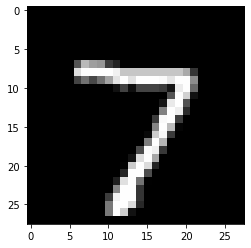

In [41]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print('Label:',label)

In [42]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [43]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()

Label: 7 ,Predicted: 4


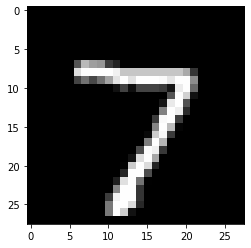

In [44]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 0 ,Predicted: 6


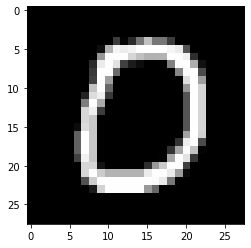

In [45]:
img,label=test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 9 ,Predicted: 3


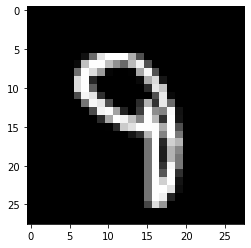

In [46]:
img,label=test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 2 ,Predicted: 4


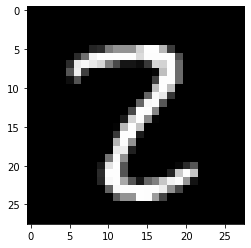

In [47]:
img,label=test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

In [48]:
#save we've train data for long time
torch.save(model.state_dict(),'mnist-logistic.pth')

In [49]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.1266e-02, -7.9933e-03, -1.1509e-02,  ..., -5.8064e-03,
                        2.7864e-02,  2.5274e-02],
                      [ 1.3963e-02,  2.0749e-02,  1.7613e-03,  ...,  2.9934e-02,
                        4.8846e-05, -1.4609e-02],
                      [ 1.5613e-02,  3.1650e-02, -1.2020e-02,  ...,  1.2338e-02,
                        2.1268e-02, -2.3806e-02],
                      ...,
                      [ 1.7613e-04,  3.4831e-02,  2.2995e-02,  ...,  1.3939e-02,
                       -4.3508e-03,  1.9715e-02],
                      [ 1.0121e-02,  1.3161e-02,  1.0336e-02,  ...,  1.7437e-02,
                       -2.4473e-02,  3.4754e-02],
                      [-8.0769e-03,  2.7330e-02, -1.7564e-02,  ...,  1.5866e-02,
                       -1.7523e-02,  1.3511e-02]])),
             ('linear.bias',
              tensor([-0.0288,  0.0223, -0.0324, -0.0285, -0.0016,  0.0090, -0.0310, -0.0026,
                      -0.0223,